In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [178]:
vorp_df = pd.read_csv("vorp_dataset_final.csv").drop(columns = ["Unnamed: 0"])
vorp_df["GPS"] = round(vorp_df["GPS"], 1)
vorp_df

,Player,VORP,HOF?,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS
0,Álex Abrines,0.1,0,15.9,4.2,1.5,48.0,5.4,58.0
1,Jaylen Adams,-0.3,0,5.4,3.0,3.2,21.8,2.0,20.5
2,LaMarcus Aldridge,33.4,0,305.6,129.6,30.4,539.2,123.2,67.2
3,Shandon Anderson,3.0,0,74.0,31.0,14.0,222.0,28.0,71.9
4,Carmelo Anthony,36.7,0,427.5,117.8,51.3,655.5,152.0,66.3
...,...,...,...,...,...,...,...,...,...
194,Trevor Winter,0.0,0,0.0,3.0,0.0,5.0,0.0,1.0
195,Luther Wright,-0.2,0,1.3,0.7,0.0,6.1,0.5,15.0
196,Danny Young,6.6,0,46.0,12.0,29.0,166.0,17.0,57.4
197,Michael Young,0.2,0,13.8,5.4,1.5,28.8,5.7,16.3


In [179]:
X = vorp_df.drop(columns = ['Player', 'VORP'])
y = vorp_df['VORP']
y

0       0.1
1      -0.3
2      33.4
3       3.0
4      36.7
       ... 
194     0.0
195    -0.2
196     6.6
197     0.2
198     0.1
Name: VORP, Length: 199, dtype: float64

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [181]:
lr = LinearRegression()

In [182]:
lr.fit(X_train, y_train)

LinearRegression()

In [183]:
c = lr.intercept_
c

-0.763391327542073

In [185]:
m = lr.coef_
m
hof_coef = m[0]
ppgsp_coef = m[1]
rpgsp_coef = m[2]
apgsp_coef = m[3]
mpgsp_coef = m[4]
fgpgsp_coef = m[5]
gps_coef = m[6]

In [186]:
y_pred_train = lr.predict(X_train)
len(y_pred_train)


139

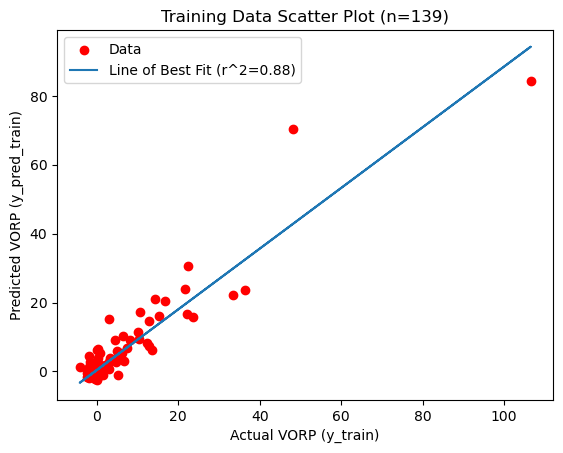

In [270]:
plt.scatter(y_train, y_pred_train, color='red')
plt.xlabel("Actual VORP (y_train)")
plt.ylabel("Predicted VORP (y_pred_train)")
plt.title("Training Data Scatter Plot (n=139)")

a, b = np.polyfit(y_train, y_pred_train, 1)
plt.plot(y_train, a*y_train+b)
r2 = r2_score(y_train, y_pred_train)
plt.legend(["Data", "Line of Best Fit (r^2=0.88)"], loc='best')

plt.savefig("train_scatter.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [188]:
r2_score(y_train, y_pred_train)

0.8805363592049201

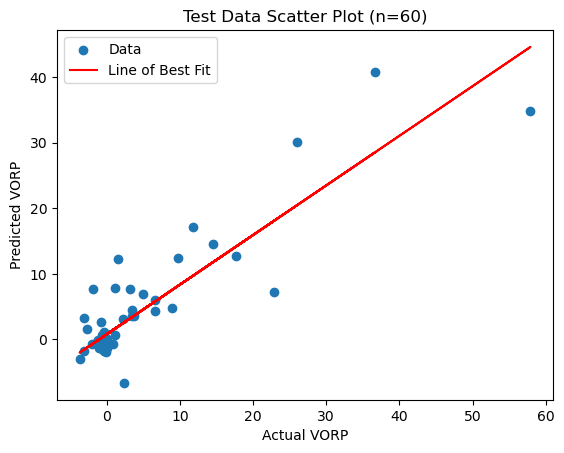

In [269]:
y_pred_test = lr.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual VORP")
plt.ylabel("Predicted VORP")
plt.title("Test Data Scatter Plot (n=60)")

a, b = np.polyfit(y_test, y_pred_test, 1)
plt.plot(y_test, a*y_test+b, color='r')
plt.legend(["Data", "Line of Best Fit"], loc='best')

plt.savefig("test_scatter.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [190]:
vorp_df['Predicted_VORP'] = (c + (vorp_df['HOF?']*hof_coef) + (vorp_df['PPG*SP']*ppgsp_coef) 
                             + (vorp_df['RPG*SP']*rpgsp_coef) + (vorp_df['APG*SP']*apgsp_coef) 
                             + (vorp_df['MPG*SP']*mpgsp_coef) + (vorp_df['FGPG*SP']*fgpgsp_coef)
                             + (vorp_df['GPS']*gps_coef))

vorp_df['Predicted_VORP'] = round(vorp_df['Predicted_VORP'], 1)

In [191]:
vorp_df

,Player,VORP,HOF?,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Predicted_VORP
0,Álex Abrines,0.1,0,15.9,4.2,1.5,48.0,5.4,58.0,-2.4
1,Jaylen Adams,-0.3,0,5.4,3.0,3.2,21.8,2.0,20.5,-0.4
2,LaMarcus Aldridge,33.4,0,305.6,129.6,30.4,539.2,123.2,67.2,22.1
3,Shandon Anderson,3.0,0,74.0,31.0,14.0,222.0,28.0,71.9,0.8
4,Carmelo Anthony,36.7,0,427.5,117.8,51.3,655.5,152.0,66.3,40.8
...,...,...,...,...,...,...,...,...,...,...
194,Trevor Winter,0.0,0,0.0,3.0,0.0,5.0,0.0,1.0,-0.5
195,Luther Wright,-0.2,0,1.3,0.7,0.0,6.1,0.5,15.0,-1.3
196,Danny Young,6.6,0,46.0,12.0,29.0,166.0,17.0,57.4,4.4
197,Michael Young,0.2,0,13.8,5.4,1.5,28.8,5.7,16.3,-0.6


In [192]:
pre_vorp_df = pd.read_csv("Pre-Vorp Players.csv")
pre_vorp_df

,Player,SP (pre-vorp),G,PPG,RPG,APG,MPG,FGPG,HOF?,PARTIAL VORP,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Total SP
0,Ed Biedenbach,1.0,7.0,0.6,0.3,0.400000,2.6,0.0,False,NaN,0.6,0.3,0.4,2.6,0.0,7.0,1.0
1,Butch Booker,1.0,12.0,5.8,7.6,0.500000,18.4,2.5,False,NaN,5.8,7.6,0.5,18.4,2.5,12.0,1.0
2,Fred Brown,2.0,122.0,10.7,3.2,4.400000,23.9,4.7,False,22.6,10.7,3.2,4.4,23.9,4.7,61.0,13.0
3,Jack Coleman,9.0,633.0,10.6,9.2,2.800000,33.1,4.4,False,NaN,10.6,9.2,2.8,33.1,4.4,70.3,9.0
4,Ed Conlin,7.0,486.0,10.1,4.8,2.000000,23.4,3.8,False,NaN,10.1,4.8,2.0,23.4,3.8,69.4,7.0
5,Steve Courtin,1.0,24.0,4.2,0.9,0.900000,13.2,1.8,False,NaN,4.2,0.9,0.9,13.2,1.8,24.0,1.0
6,Gary Gray,1.0,44.0,2.4,0.5,0.600000,6.3,1.1,False,NaN,2.4,0.5,0.6,6.3,1.1,44.0,1.0
7,Dick Groat,1.0,26.0,11.9,3.3,2.700000,25.5,3.8,False,NaN,11.9,3.3,2.7,25.5,3.8,26.0,1.0
8,Matt Guokas,7.0,522.0,5.9,2.2,3.200000,22.7,3.4,False,0.2,5.9,2.2,3.2,22.7,3.4,74.6,10.0
9,Tom Hagan,2.0,73.0,4.9,1.5,1.800000,12.5,1.9,False,NaN,4.9,1.5,1.8,12.5,1.9,36.5,2.0


In [42]:
pre_vorp_df = pre_vorp_df[pre_vorp_df['Player'].notna()]
pre_vorp_df

,Player,SP (pre-vorp),G,PPG,RPG,APG,MPG,FGPG,HOF?,PARTIAL VORP,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Total SP
0,Ed Biedenbach,1.0,7.0,0.6,0.3,0.4,2.6,0.0,False,NaN,0.6,0.3,0.4,2.6,0.0,7.0,1.0
1,Butch Booker,1.0,12.0,5.8,7.6,0.5,18.4,2.5,False,NaN,5.8,7.6,0.5,18.4,2.5,12.0,1.0
2,Fred Brown,2.0,122.0,10.7,3.2,4.4,23.9,4.7,False,22.6,10.7,3.2,4.4,23.9,4.7,61.0,13.0
3,Jack Coleman,9.0,633.0,10.6,9.2,2.8,33.1,4.4,False,NaN,10.6,9.2,2.8,33.1,4.4,70.3,9.0
4,Ed Conlin,7.0,486.0,10.1,4.8,2.0,23.4,3.8,False,NaN,10.1,4.8,2.0,23.4,3.8,69.4,7.0
5,Steve Courtin,1.0,24.0,4.2,0.9,0.9,13.2,1.8,False,NaN,4.2,0.9,0.9,13.2,1.8,24.0,1.0
6,Gary Gray,1.0,44.0,2.4,0.5,0.6,6.3,1.1,False,NaN,2.4,0.5,0.6,6.3,1.1,44.0,1.0
7,Dick Groat,1.0,26.0,11.9,3.3,2.7,25.5,3.8,False,NaN,11.9,3.3,2.7,25.5,3.8,26.0,1.0
8,Matt Guokas,7.0,522.0,5.9,2.2,3.2,22.7,3.4,False,0.2,5.9,2.2,3.2,22.7,3.4,74.6,10.0
9,Tom Hagan,2.0,73.0,4.9,1.5,1.8,12.5,1.9,False,NaN,4.9,1.5,1.8,12.5,1.9,36.5,2.0


In [193]:
pre_vorp_df["HOF?"] = pre_vorp_df["HOF?"].astype("category")
pre_vorp_df["HOF?"] = pre_vorp_df["HOF?"].cat.codes
pre_vorp_df

,Player,SP (pre-vorp),G,PPG,RPG,APG,MPG,FGPG,HOF?,PARTIAL VORP,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Total SP
0,Ed Biedenbach,1.0,7.0,0.6,0.3,0.400000,2.6,0.0,0,NaN,0.6,0.3,0.4,2.6,0.0,7.0,1.0
1,Butch Booker,1.0,12.0,5.8,7.6,0.500000,18.4,2.5,0,NaN,5.8,7.6,0.5,18.4,2.5,12.0,1.0
2,Fred Brown,2.0,122.0,10.7,3.2,4.400000,23.9,4.7,0,22.6,10.7,3.2,4.4,23.9,4.7,61.0,13.0
3,Jack Coleman,9.0,633.0,10.6,9.2,2.800000,33.1,4.4,0,NaN,10.6,9.2,2.8,33.1,4.4,70.3,9.0
4,Ed Conlin,7.0,486.0,10.1,4.8,2.000000,23.4,3.8,0,NaN,10.1,4.8,2.0,23.4,3.8,69.4,7.0
5,Steve Courtin,1.0,24.0,4.2,0.9,0.900000,13.2,1.8,0,NaN,4.2,0.9,0.9,13.2,1.8,24.0,1.0
6,Gary Gray,1.0,44.0,2.4,0.5,0.600000,6.3,1.1,0,NaN,2.4,0.5,0.6,6.3,1.1,44.0,1.0
7,Dick Groat,1.0,26.0,11.9,3.3,2.700000,25.5,3.8,0,NaN,11.9,3.3,2.7,25.5,3.8,26.0,1.0
8,Matt Guokas,7.0,522.0,5.9,2.2,3.200000,22.7,3.4,0,0.2,5.9,2.2,3.2,22.7,3.4,74.6,10.0
9,Tom Hagan,2.0,73.0,4.9,1.5,1.800000,12.5,1.9,0,NaN,4.9,1.5,1.8,12.5,1.9,36.5,2.0


In [199]:
pre_vorp_df = pre_vorp_df.drop(columns = ['G', 'PPG', 'RPG', 'APG', 'FGPG', 'MPG'])
pre_vorp_df = pre_vorp_df.drop([27, 28, 29])
pre_vorp_df

,Player,SP (pre-vorp),HOF?,PARTIAL VORP,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Total SP
0,Ed Biedenbach,1.0,0,NaN,0.6,0.3,0.4,2.6,0.0,7.0,1.0
1,Butch Booker,1.0,0,NaN,5.8,7.6,0.5,18.4,2.5,12.0,1.0
2,Fred Brown,2.0,0,22.6,10.7,3.2,4.4,23.9,4.7,61.0,13.0
3,Jack Coleman,9.0,0,NaN,10.6,9.2,2.8,33.1,4.4,70.3,9.0
4,Ed Conlin,7.0,0,NaN,10.1,4.8,2.0,23.4,3.8,69.4,7.0
5,Steve Courtin,1.0,0,NaN,4.2,0.9,0.9,13.2,1.8,24.0,1.0
6,Gary Gray,1.0,0,NaN,2.4,0.5,0.6,6.3,1.1,44.0,1.0
7,Dick Groat,1.0,0,NaN,11.9,3.3,2.7,25.5,3.8,26.0,1.0
8,Matt Guokas,7.0,0,0.2,5.9,2.2,3.2,22.7,3.4,74.6,10.0
9,Tom Hagan,2.0,0,NaN,4.9,1.5,1.8,12.5,1.9,36.5,2.0


In [200]:
est_vorp = []
length = len(pre_vorp_df['SP (pre-vorp)'])

for row in range(length):

    if pre_vorp_df['SP (pre-vorp)'][row] == pre_vorp_df['Total SP'][row]:
        est_vorp.append(round((c + (pre_vorp_df['HOF?'][row]*hof_coef) 
                         + (pre_vorp_df['PPG*SP'][row]*ppgsp_coef)
                         + (pre_vorp_df['RPG*SP'][row]*rpgsp_coef)
                         + (pre_vorp_df['APG*SP'][row]*apgsp_coef)
                         + (pre_vorp_df['MPG*SP'][row]*mpgsp_coef)
                         + (pre_vorp_df['FGPG*SP'][row]*fgpgsp_coef) 
                         + (pre_vorp_df['GPS'][row]*gps_coef)), 1))
        
    else:
        hof_fraction = pre_vorp_df['SP (pre-vorp)'][row]/pre_vorp_df['Total SP'][row]
        
        est_vorp.append(round((c + (pre_vorp_df['HOF?'][row]*(hof_coef*(hof_fraction))) 
                         + (pre_vorp_df['PPG*SP'][row]*ppgsp_coef)
                         + (pre_vorp_df['RPG*SP'][row]*rpgsp_coef)
                         + (pre_vorp_df['APG*SP'][row]*apgsp_coef)
                         + (pre_vorp_df['MPG*SP'][row]*mpgsp_coef)
                         + (pre_vorp_df['FGPG*SP'][row]*fgpgsp_coef) 
                         + (pre_vorp_df['GPS'][row]*gps_coef)
                         + pre_vorp_df['PARTIAL VORP'][row]), 1))

est_vorp

[-0.7,
 -0.2,
 21.3,
 -1.3,
 -1.7,
 -1.6,
 -2.1,
 -0.0,
 -2.8,
 -1.3,
 -1.1,
 -2.7,
 -1.7,
 -0.9,
 -2.1,
 -1.0,
 -1.7,
 -2.4,
 -1.2,
 -1.9,
 90.1,
 20.8,
 19.5,
 23.0,
 18.8,
 18.9,
 17.2]

In [201]:
pre_vorp_df['Estimated VORP'] = est_vorp
pre_vorp_df

,Player,SP (pre-vorp),HOF?,PARTIAL VORP,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Total SP,Estimated VORP
0,Ed Biedenbach,1.0,0,NaN,0.6,0.3,0.4,2.6,0.0,7.0,1.0,-0.7
1,Butch Booker,1.0,0,NaN,5.8,7.6,0.5,18.4,2.5,12.0,1.0,-0.2
2,Fred Brown,2.0,0,22.6,10.7,3.2,4.4,23.9,4.7,61.0,13.0,21.3
3,Jack Coleman,9.0,0,NaN,10.6,9.2,2.8,33.1,4.4,70.3,9.0,-1.3
4,Ed Conlin,7.0,0,NaN,10.1,4.8,2.0,23.4,3.8,69.4,7.0,-1.7
5,Steve Courtin,1.0,0,NaN,4.2,0.9,0.9,13.2,1.8,24.0,1.0,-1.6
6,Gary Gray,1.0,0,NaN,2.4,0.5,0.6,6.3,1.1,44.0,1.0,-2.1
7,Dick Groat,1.0,0,NaN,11.9,3.3,2.7,25.5,3.8,26.0,1.0,-0.0
8,Matt Guokas,7.0,0,0.2,5.9,2.2,3.2,22.7,3.4,74.6,10.0,-2.8
9,Tom Hagan,2.0,0,NaN,4.9,1.5,1.8,12.5,1.9,36.5,2.0,-1.3


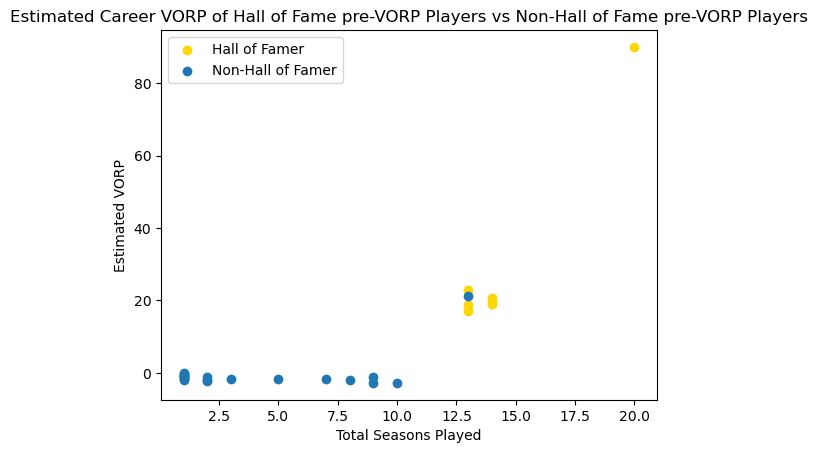

In [268]:
no_hof = []
no_hof_sp = []
hof = []
hof_sp = []


for i in range(len(pre_vorp_df['HOF?'])):
    if pre_vorp_df['HOF?'][i] == 0:
        no_hof.append(pre_vorp_df['Estimated VORP'][i])
        no_hof_sp.append(pre_vorp_df['Total SP'][i])
    else:
        hof.append(pre_vorp_df['Estimated VORP'][i])
        hof_sp.append(pre_vorp_df['Total SP'][i])

plt.scatter(hof_sp, hof, c="gold")
plt.scatter(no_hof_sp, no_hof)
plt.xlabel('Total Seasons Played')
plt.ylabel('Estimated VORP')
plt.title('Estimated Career VORP of Hall of Fame pre-VORP Players vs Non-Hall of Fame pre-VORP Players')
plt.legend(["Hall of Famer", "Non-Hall of Famer"], loc='best')

plt.savefig("est_vorp_HOF_vs.png")
plt.show()

<Figure size 640x480 with 0 Axes>

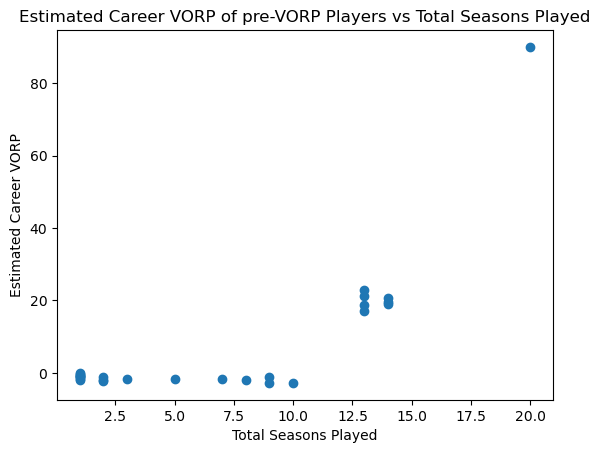

In [267]:
plt.scatter(pre_vorp_df['Total SP'], pre_vorp_df['Estimated VORP'])
plt.xlabel('Total Seasons Played')
plt.ylabel('Estimated Career VORP')
plt.title('Estimated Career VORP of pre-VORP Players vs Total Seasons Played')

plt.savefig("est_vorp_scatter.png")
plt.show()

<Figure size 640x480 with 0 Axes>

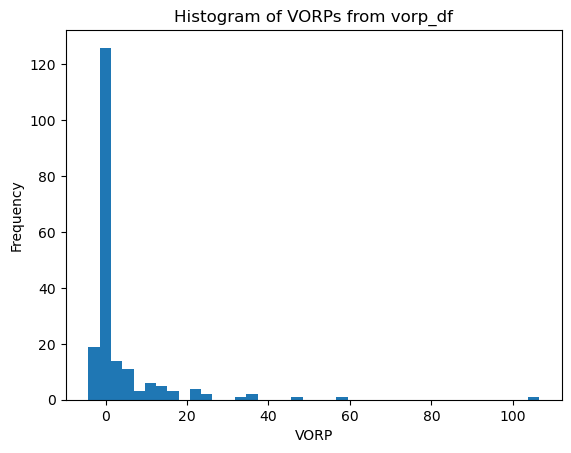

In [266]:
plt.hist(vorp_df['VORP'], bins = 40)
plt.xlabel("VORP")
plt.ylabel("Frequency")
plt.title("Histogram of VORPs from vorp_df")

plt.savefig("actual_VORP_hist.png")
plt.show()

<Figure size 640x480 with 0 Axes>

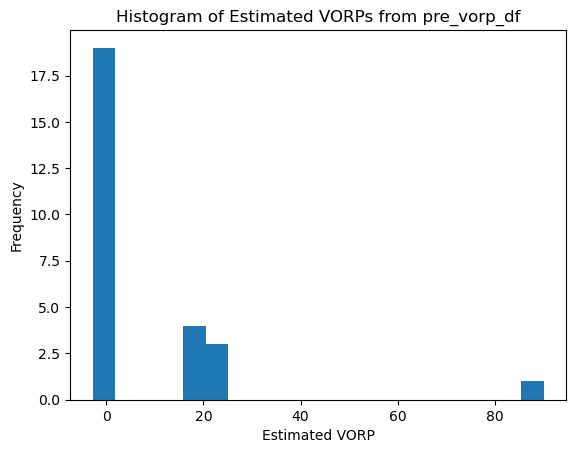

In [265]:
plt.hist(pre_vorp_df['Estimated VORP'], bins = 20)
plt.xlabel("Estimated VORP")
plt.ylabel("Frequency")
plt.title("Histogram of Estimated VORPs from pre_vorp_df")

plt.savefig("est_vorp_hist.png")
plt.show()

<Figure size 640x480 with 0 Axes>

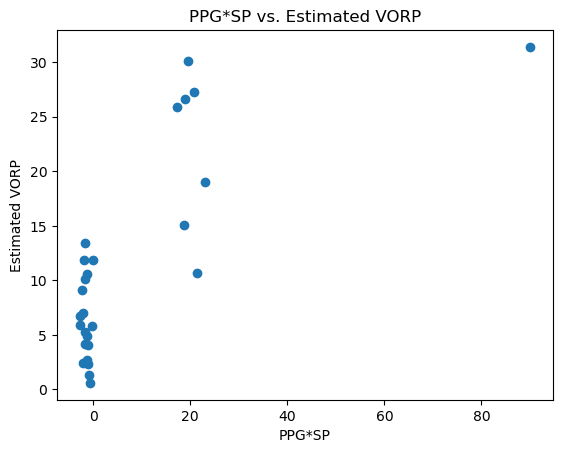

In [264]:
plt.scatter(pre_vorp_df["Estimated VORP"], pre_vorp_df["PPG*SP"])
plt.xlabel("PPG*SP")
plt.ylabel("Estimated VORP")
plt.title("PPG*SP vs. Estimated VORP")

plt.savefig("est_vorp_ppgsp_scatter.png")
plt.show()

<Figure size 640x480 with 0 Axes>

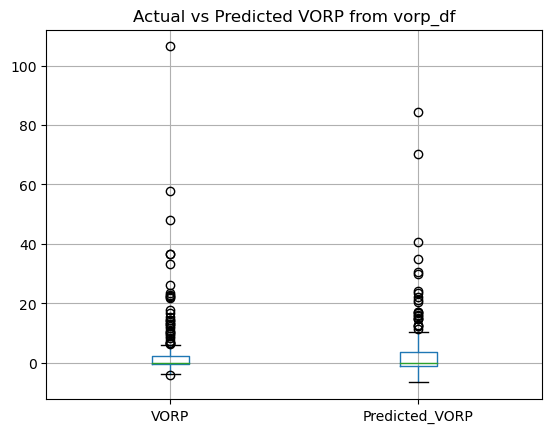

In [263]:
boxplot = vorp_df.boxplot(column=['VORP','Predicted_VORP'])
plt.title("Actual vs Predicted VORP from vorp_df")
plt.savefig("actual_vs_pred_VORP_boxplot.png")
plt.show()

In [ ]:
# plt.savefig("image.png")

# ![Figure1](images/image.png)